<h1>Forecasting Financial Time Series</h1>

<h2>Introduction</h2>

To predict stock price development, Apple and Google stock data from 2019 to 2020 was extracted and explained trend and seasonality. After that, three different types of forecasting models using Simple Exponential Smoothing (SES), Double Exponential Smoothing (DES), Triple Exponential Smoothing (Holt-Winters Method) were created. For the last two methods, four different alpha values were selected, which are 0.1, 0.3, 0.5, 0.8. The models were evaluated with root mean squared values, and the best model was concluded. Another model by the linear regression was created as well to compare with other models, and it was diagnosed with residuals versus fitted, scale-location, normal q-q, residuals versus leverage plots. In conclusion, the suitable forecasting method was chosen for the stock prediction, and the final best model was summarized. 

In [1]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels import api as sm
from scipy import stats
import seaborn as sns
import yfinance as yf
from yahoofinancials import YahooFinancials
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import warnings
warnings.filterwarnings("ignore")

<h2>Data Preparation </h2>

Get Apple and Google stock data from *2019-01-01* to *2020-12-31*. The data description for each column is below:
- Open: The stock price at the start of that day/month/year.
- Close: the stock price at the conclusion of that particular day/month/year
- High: the stock’s highest price that day/month/year.
- Low: the stock’s lowest price that day/month/year.
- Volume: The number of shares traded that day/month/year

<h3>1) Apple stock data and multiplicative decomposition</h3>

In [40]:
# download apple stock data
apple = yf.download('AAPL', start = '2019-01-01', end = '2020-12-31', progress = False)
apple.head() # display first five rows of the data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.277527,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.464802,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.936085,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.856091,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.539616,164101200


There are a total 504 rows, one datetime index and six columns including open, high, low, close, adjust close, volume in the Apple stock dataset.

In [41]:
apple.info() # check data types

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2019-01-02 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       504 non-null    float64
 1   High       504 non-null    float64
 2   Low        504 non-null    float64
 3   Close      504 non-null    float64
 4   Adj Close  504 non-null    float64
 5   Volume     504 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.6 KB


In [42]:
pd.date_range(start = "2019-01-01", end = "2020-12-31", freq = 'M') # set freq

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

Below the plots show trend, seasonality, and residuals, and the multiplicative decomposition method was chosen since the stock close price appears directly proportional over the time. The trend graph demonstrates that the price has increased over time, and the seasonality graph displays up and down patterns by month. 

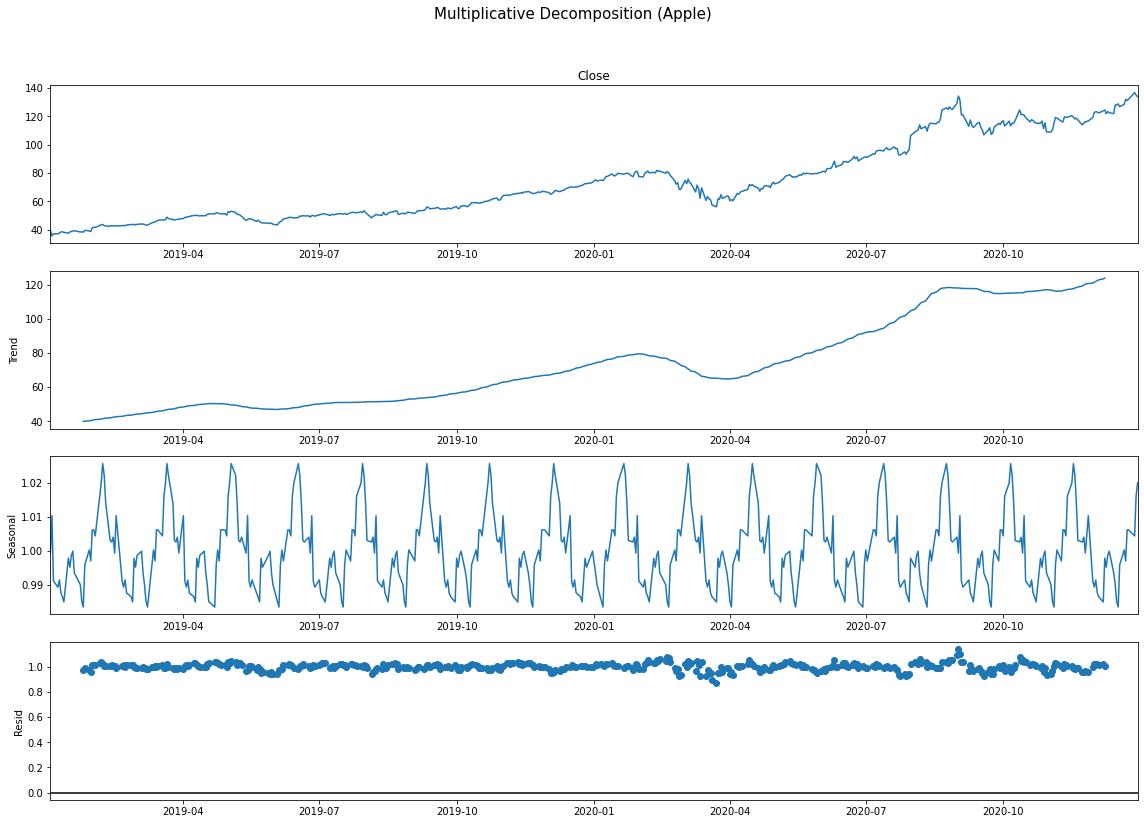

In [5]:
# multiplicative decomposition 
multiplicative_decomposition_apple = seasonal_decompose(apple['Close'], model = 'multiplicative', period = 30)

# create plot for observed, trend, seasonal, residual
plt.rcParams.update({'figure.figsize':(16,12)})
multiplicative_decomposition_apple.plot().suptitle('Multiplicative Decomposition (Apple)', fontsize = 15)
plt.tight_layout(rect = [0, 0.03, 1, 0.95])

<h3>2) Google stock data and multiplicative decomposition</h3>

Google stock dataset was also extracted, and the multiplicative time series graphs were created by trend, seasonality and residuals. It shows the price trend increased over the time like Apple stock trend.

In [6]:
# download google stock data
google = yf.download('goog', start = '2019-01-01', end = '2020-12-31', progress = False)
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


In [7]:
google.info() # check data types

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2019-01-02 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       504 non-null    float64
 1   High       504 non-null    float64
 2   Low        504 non-null    float64
 3   Close      504 non-null    float64
 4   Adj Close  504 non-null    float64
 5   Volume     504 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.6 KB


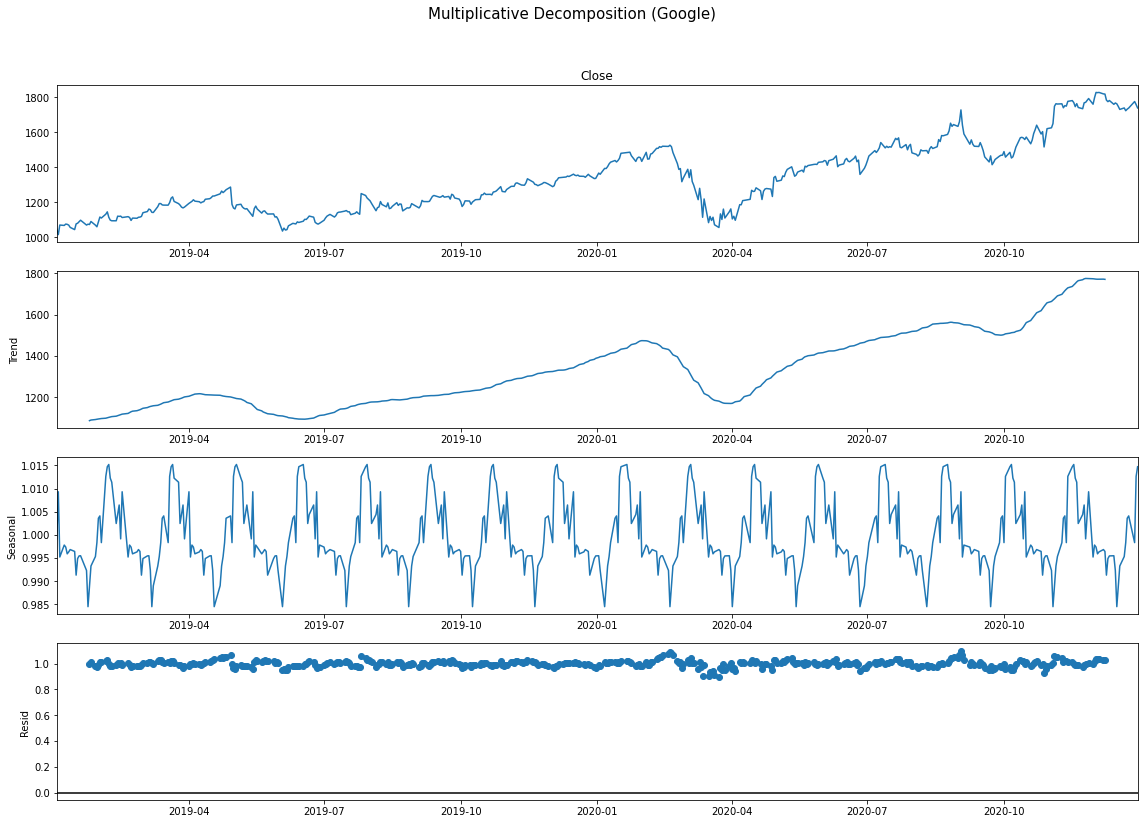

In [8]:
# multiplicative decomposition
multiplicative_decomposition_google = seasonal_decompose(google['Close'], model = 'multiplicative', period = 30)

# create plot for observed, trend, seasonal, residual
plt.rcParams.update({'figure.figsize':(16,12)})
multiplicative_decomposition_google.plot().suptitle('Multiplicative Decomposition (Google)', fontsize = 15)
plt.tight_layout(rect = [0, 0.03, 1, 0.95])

<h2>Forecsting</h2>

After checking the trend and seasonality, forecasting models were created using three different methods for each stock data. Four different smoothing levels (alpha) were given for the models, which are 0.1, 0.3, 0.5, 0.8. 

<h3>1) Simple Exponential Smoothing (SES)</h3>

Simple Exponential Smoothing (SES) method was used first, it is usually used for univariate data without a trend or seasonality. Four alpha values were used to compare prediction, larager values mean that the model focuses on the most recent past data (observations). On the other hand, the smaller alpha values take further data to make a prediction. 

<h4>a) Apple stock price forecasting</h4>

Since the data only contians business day stock prices, the data was resample by month. 

In [9]:
# resample apple stock data by month
apple_monthly = apple.resample('M').last()
apple_monthly

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-31,41.527500,42.250000,41.139999,41.610001,40.342651,162958400
2019-02-28,43.580002,43.727501,43.230000,43.287498,42.149048,112861600
2019-03-31,47.457500,47.520000,47.134998,47.487499,46.238590,94256000
2019-04-30,50.764999,50.849998,49.777500,50.167500,48.848110,186139600
2019-05-31,44.057499,44.497501,43.747501,43.767502,42.780544,108174400
2019-06-30,49.669998,49.875000,49.262501,49.480000,48.364223,124442400
2019-07-31,54.105000,55.342499,52.825001,53.259998,52.058990,277125600
2019-08-31,52.540001,52.612499,51.799999,52.185001,51.202034,84573600
2019-09-30,55.224998,56.145000,55.197498,55.992500,54.937813,103909600


In [10]:
# save four different alpha values and colors in dictionary
dict = {0.1:"blue", 0.3:"red", 0.5:"orange", 0.8:"green"}

In [11]:
# create a function for simple exponential smoothing
def ses(data, smoothing_level, color):
    # split the dataset into train and test
    train = data[0:21]
    test = data[20:]
    y_hat_avg = test.copy()

    # fit simple exponential smoothing
    fit = SimpleExpSmoothing(np.asarray(train['Close'])).fit(smoothing_level = smoothing_level)
    y_hat_avg['SES'] = fit.forecast(len(test)) # forecast

    # plot
    a = plt.plot(train['Close'], marker = "o")
    b = plt.plot(test['Close'], marker = "o")
    c = plt.plot(y_hat_avg['SES'], marker = "o", label = f'alpha = {smoothing_level}')
    plt.legend()
    
    # calculate root mean squred
    rms = np.sqrt(mean_squared_error(test.Close, y_hat_avg.SES))
    print(f'rms : {rms} (alpha = {smoothing_level})')
    return a,b,c

To confirm the prediction model with actual stock development, the data split into training and test sets. Last three months were assigned to the test set, the price decreased in October and started to increase from Nobermber to the end of December. The prediction graphs show that the price remains the same for three months, and they are different by the smoothing level. When the alpha is 0.8, it shows the most similar price range with the actual price. The root mean squred value is approximately 9.28 when the alpha is 0.8, and it is the lowest amongst others. 

rms : 40.180850117087616 (alpha = 0.1)
rms : 17.76593035051178 (alpha = 0.3)
rms : 10.62592693199738 (alpha = 0.5)
rms : 9.280035273317864 (alpha = 0.8)


Text(0.5, 1.0, 'Simple Exponential Smoothing (Apple)')

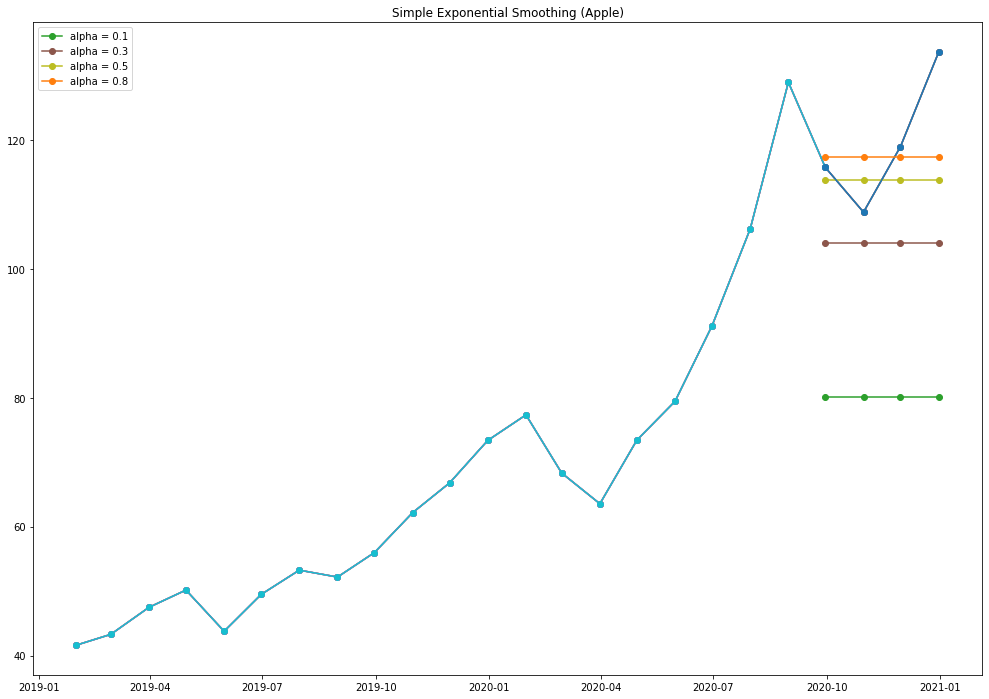

In [12]:
# apple stock simple exponential smoothing forecasting graph
plt.figure(figsize = (17,12))
for i in dict:
    ses(apple_monthly, i, dict[i])
plt.title("Simple Exponential Smoothing (Apple)")

<h4> b) Google stock price forecasting</h4>

Google data was resample monthly as well.

In [13]:
# resample google stock data by month
google_monthly = google.resample('M').last()
google_monthly

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-31,1103.000000,1117.329956,1095.410034,1116.369995,1116.369995,1538300
2019-02-28,1111.300049,1127.650024,1111.010010,1119.920044,1119.920044,1542500
2019-03-31,1174.900024,1178.989990,1162.880005,1173.310059,1173.310059,1269900
2019-04-30,1185.000000,1192.810059,1175.000000,1188.479980,1188.479980,6207000
2019-05-31,1101.290039,1109.599976,1100.180054,1103.630005,1103.630005,1507800
2019-06-30,1076.390015,1081.000000,1073.369995,1080.910034,1080.910034,1693200
2019-07-31,1223.000000,1234.000000,1207.764038,1216.680054,1216.680054,1725500
2019-08-31,1198.500000,1198.500000,1183.802979,1188.099976,1188.099976,1129800
2019-09-30,1220.969971,1226.000000,1212.300049,1219.000000,1219.000000,1404100


For Google stock prediction, 0.5 alpha value shows the closest price with actual stock price, and the root mean squared value is lower than others, which is about 185.77. 

rms : 318.63320931772483 (alpha = 0.1)
rms : 213.44523442016472 (alpha = 0.3)
rms : 185.77453157893467 (alpha = 0.5)
rms : 190.9404418729014 (alpha = 0.8)


Text(0.5, 1.0, 'Simple Exponential Smoothing (Google)')

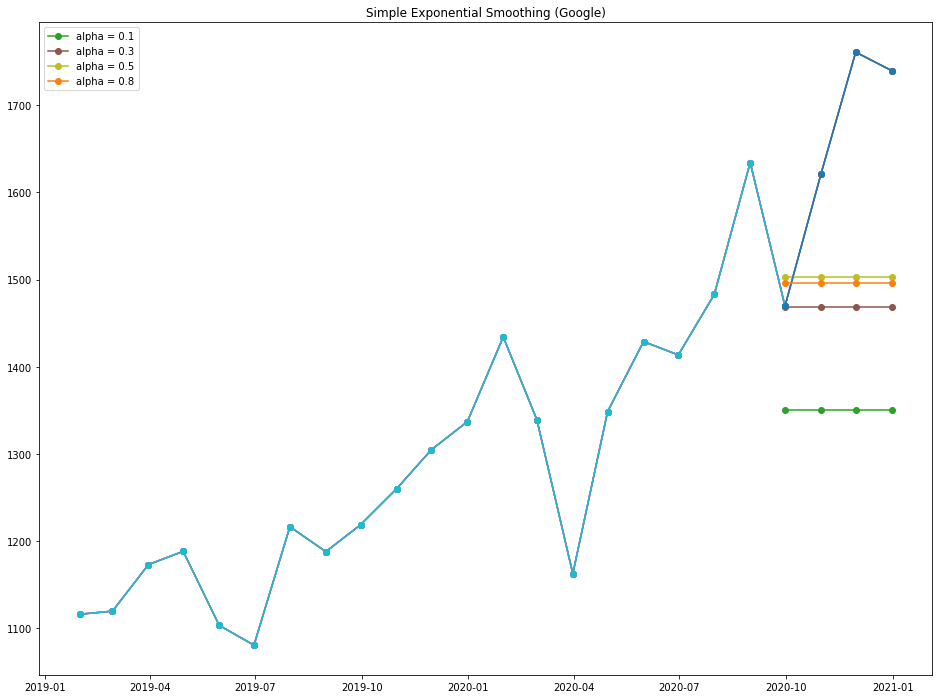

In [14]:
# google simple exponential smoothing forecasting graph
for i in dict:
    ses(google_monthly, i, dict[i])
plt.title("Simple Exponential Smoothing (Google)")

<h3> 2) Double Exponential Smoothing (DES) </h3>

Double Exponential Smoothing (DES) is another extension of Exponential Smoothing, however, it supports the trend in time series models. It has a smoothing level (alpha) too, but there is another influence factor called beta that controls trend. Beta values were assigned to 0.2 for every model so that can be compared by different alpha values. Smaller beta values focus on longer-term trends, wheares larger values consider shorter-term trends. 


In [15]:
# create a function for double exponential smoothing
def des(data, smoothing_level, smoothing_trend, color):
    train = data[0:21]
    test = data[20:]
    y_hat_avg = test.copy()
    fit = Holt(np.asarray(train['Close'])).fit(smoothing_level = smoothing_level, smoothing_trend = smoothing_trend)
    y_hat_avg['DES'] = fit.forecast(len(test))
    a = plt.plot(train['Close'], marker = "o")
    b = plt.plot(test['Close'], marker = "o")
    c = plt.plot(y_hat_avg['DES'], marker = "o", label = f'alpha = {smoothing_level}')
    plt.legend()
    rms = np.sqrt(mean_squared_error(test.Close, y_hat_avg.DES))
    print(f'rms : {rms} (alpha = {smoothing_level})')
    return a,b,c

<h4> a) Apple stock forecasting</h4>

The result shows that 0.1 smoothing level is similar to the actual stock prediction, and the root mean squared is also small, which is around 9.25.


rms : 9.25283130228708 (alpha = 0.1)
rms : 11.188801701841648 (alpha = 0.3)
rms : 18.763761267592855 (alpha = 0.5)
rms : 16.99979603624605 (alpha = 0.8)


Text(0.5, 1.0, 'Double Exponential Smoothing (Apple)')

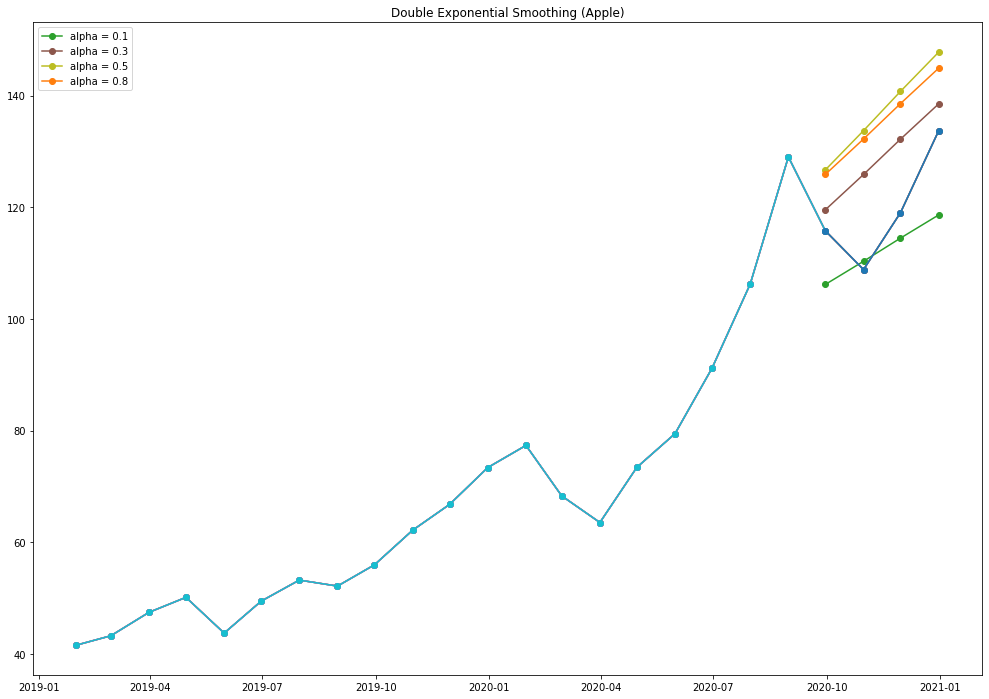

In [16]:
# apple stock double exponential smoothing forecasting graph
plt.figure(figsize = (17,12))
for i in dict:
    des(apple_monthly, i, 0.2, dict[i])
plt.title("Double Exponential Smoothing (Apple)")

<h4> b) Google stock forecasting</h4>

Googld stock price predicted with the same alpha and beta values like Apple, the root mean squred for 0.5 smoothing level shows the lowest value, which is about 97.66.

rms : 134.74112629456917 (alpha = 0.1)
rms : 103.34612378306149 (alpha = 0.3)
rms : 97.6626874182619 (alpha = 0.5)
rms : 131.43853888966842 (alpha = 0.8)


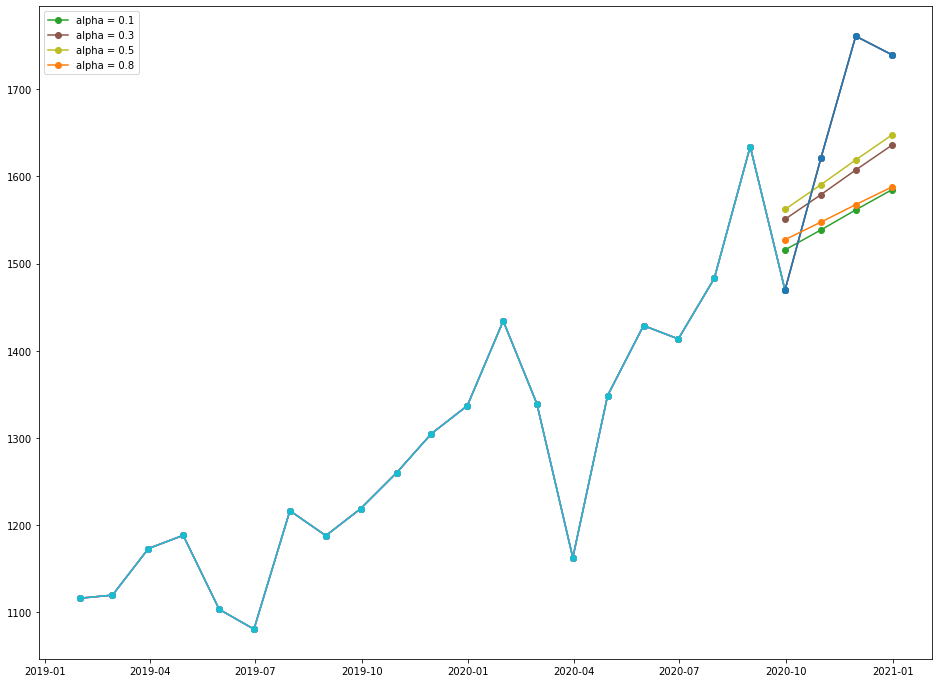

In [17]:
# google stock double exponential smoothing forecasting graph
for i in dict:
    des(google_monthly, i, 0.2, dict[i])

<h3> 3) Triple Exponential Smoothing (Holt-Winters Method) </h3>

Triple Exponential Smoothing, also known as Holt-Winter Smoothing, supports seasonality to the models. It has alpha and beta smoothing factors, but there is also another parameter called gamma, which controls effect on the seasonal components. 

In [56]:
# create a function for Triple Exponential Smoothing
def tes(data, smoothing_level, smoothing_trend, color):
    train = data[0:21]
    test = data[20:]
    y_hat_avg = test.copy()
    fit = ExponentialSmoothing(np.asarray(train['Close']), trend = 'mul', seasonal = 'mul', seasonal_periods = 2).fit(smoothing_level = smoothing_level,smoothing_trend = smoothing_trend)
    y_hat_avg['Holt_Winter'] = fit.forecast(len(test))
    a = plt.plot(train['Close'], marker = "o")
    b = plt.plot(test['Close'], marker = "o")
    c = plt.plot(y_hat_avg['Holt_Winter'], marker = "o", label = f'alpha = {smoothing_level}')
    plt.legend()
    rms = np.sqrt(mean_squared_error(test.Close, y_hat_avg.Holt_Winter))
    print(f'rms : {rms} (alpha = {smoothing_level})')
    return a,b,c

<h4> a) Apple stock forecasting</h4>

For this prediction, the root mean squared values are similar to each other, and the forecasting models look about the same. However, when the alpha is 0.8 the root mean suqred value is the lowest, which is about 30.21.

rms : 34.21917365220058 (alpha = 0.1)
rms : 33.15893548985411 (alpha = 0.3)
rms : 31.968030807850198 (alpha = 0.5)
rms : 30.21423431238558 (alpha = 0.8)


/usr/local/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Text(0.5, 1.0, 'Triple exponential smoothing (Apple)')

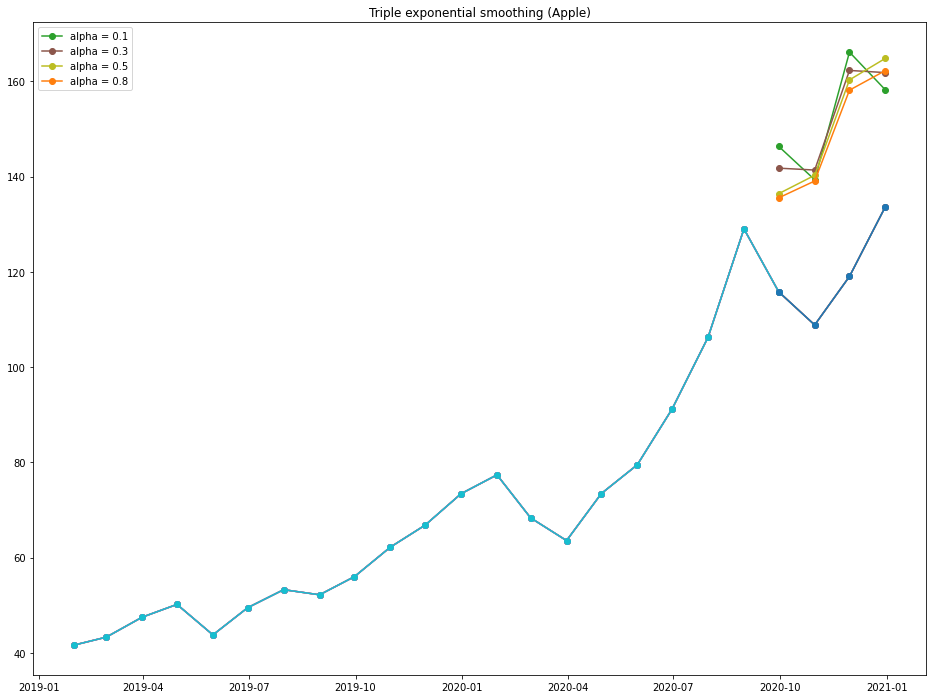

In [57]:
# apple stock triple exponential smoothing forecasting graph
for i in dict:
    tes(apple_monthly, i, 0.2, dict[i])
plt.title("Triple exponential smoothing (Apple)")

<h4> b) Google stock forecasting</h4>

For Google, the result displays that when the alpha is 0.5, it shows the most similar development and the root mean squared value is the lowest, which is around 87.50.

rms : 125.40300396666343 (alpha = 0.1)
rms : 93.09297620243274 (alpha = 0.3)
rms : 87.50469331847006 (alpha = 0.5)
rms : 111.87341688620477 (alpha = 0.8)


Text(0.5, 1.0, 'Triple exponential smoothing (Google)')

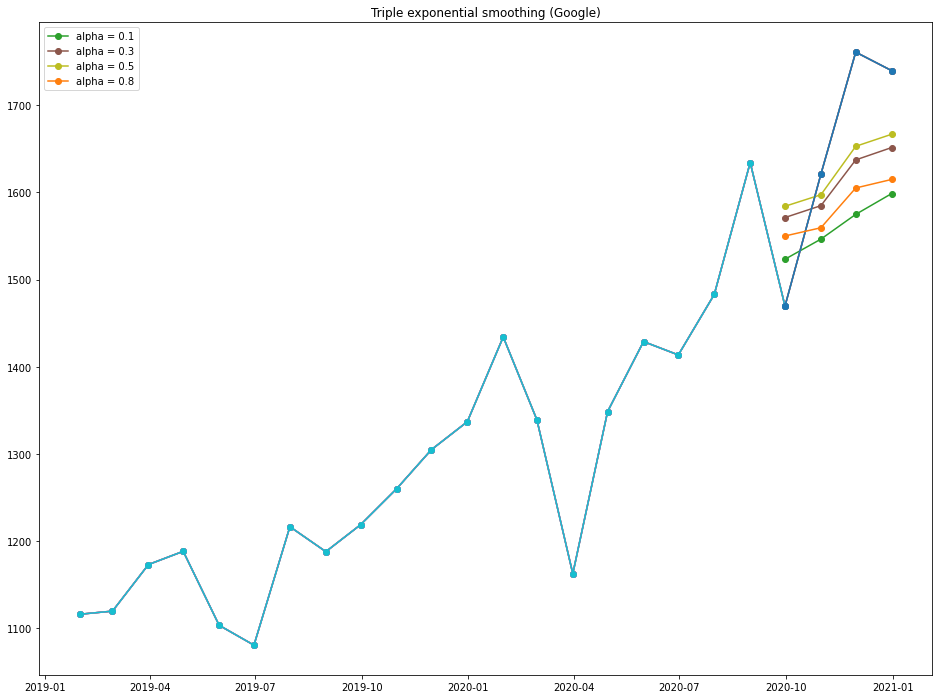

In [20]:
# google stock triple exponential smoothing forecasting graph
for i in dict:
    tes(google_monthly, i, 0.2, dict[i])
plt.title("Triple exponential smoothing (Google)")

<h2>Linear regression models and Diagnostics</h2>

For another forecasting method, linear regression models were created with close stock price and date columns. To check the stock price development, the price over the time was visualized, and then the regression line was built based on that. After creating the model, it was diagnosed to check if the model could perform well. 

<h3> 1) Apple </h3>

Below the graph shows Apple close stock price development between January 2019 and December 2020. Overall the price increased over time, however, there was a huge drop in April 2020. Also the increase in September 2020 was extreme. 

Text(0.5, 1.0, 'Stock Price development (Apple)')

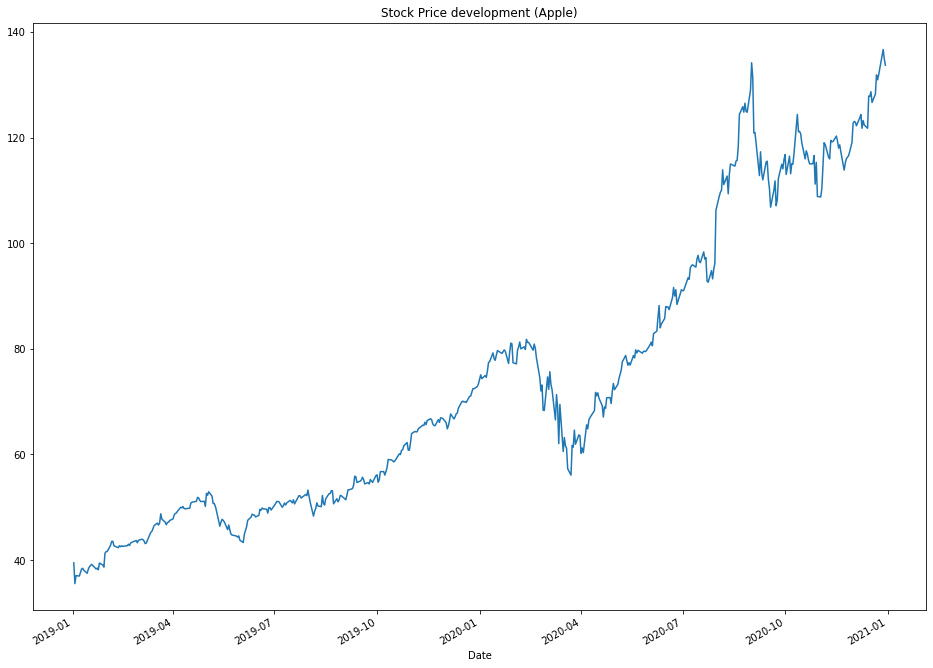

In [21]:
# create apple stock development
apple['Close'].plot()
plt.title('Stock Price development (Apple)')

Based on the development, the linear regression line was created. The price increases as time goes. The root mean squared value for thie model is about 9.17. 

9.173370356120474


Text(0.5, 1.0, 'Apple stock prediction with Linear Regression')

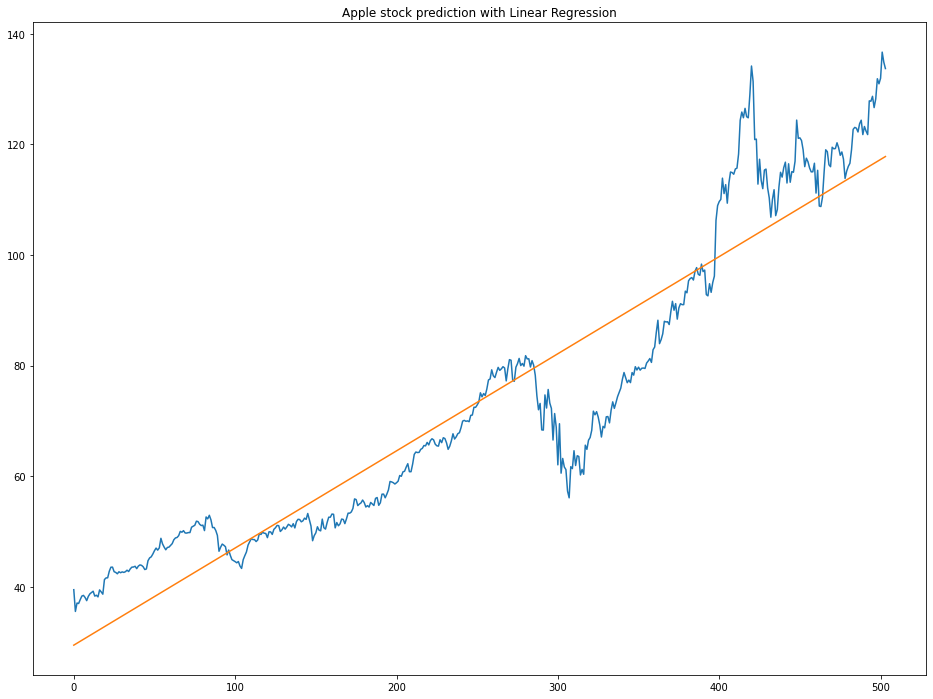

In [22]:
# apple stock forecasting using linear regression
apple = apple.reset_index()
x = np.array(apple.index).reshape(-1,1)
y = apple['Close']

lr = LinearRegression().fit(x,y)
lr.score(x,y)
apple_pred = lr.predict(x)
print(np.sqrt(mean_squared_error(apple_pred, y)))

plt.plot(apple['Close'])
plt.plot(apple.index, apple_pred)
plt.title("Apple stock prediction with Linear Regression")

Other evaluation values were calculated too, for example, the adjusted R-squred is about 0.886, meaning the model has reasonable positive linear relationship. AIC or BIC value can be compared with other models as well, if the value is low, that model might be better than the other one. 

In [23]:
x_constant_apple = sm.add_constant(x)
result_apple = sm.OLS(y,x_constant_apple).fit()
result_apple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     3897.
Date:                Sat, 12 Mar 2022   Prob (F-statistic):          9.60e-239
Time:                        01:35:41   Log-Likelihood:                -1832.2
No. Observations:                 504   AIC:                             3668.
Df Residuals:                     502   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.4521      0.818     36.021      0.000      27.846      31.059
x1             0.1757      0.003     62.423      0.000       0.170       0.181
==============================================================================
Omnibus:                        6.327   Durbin-Watson:                   0.044
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                6.872
Skew:                          -0.183   Prob(JB):                       0.0322
Kurtosis:                       3.440   Cond. No.                         580.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To diagnose the linear model, four different diagnostic plots were created - residuals versus fitted, scale-location, normal q-q, residuals versus leverage. The residuals versus fitted plot is used to check the linearity, the scale-location is for residuals’ independence, normal q-q is to confirm the residuals are approximately normally distributed, the residuals versus leverage is to check if there are any influential data points. 

In [24]:
fitted_y = result_apple.fittedvalues
residuals = result_apple.resid
norm_resid = result_apple.get_influence().resid_studentized_internal
norm_resid_abs_sqrt = np.sqrt(np.abs(norm_resid))
abs_resid = np.abs(residuals)
leverage = result_apple.get_influence().hat_matrix_diag

The data points in residuals versus fitted plot should be placed in the middle around the horizontal red line without any patterns. However, the data points were not placed as we expected, meaning it might not be good for the linear model. 

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Fitted values')

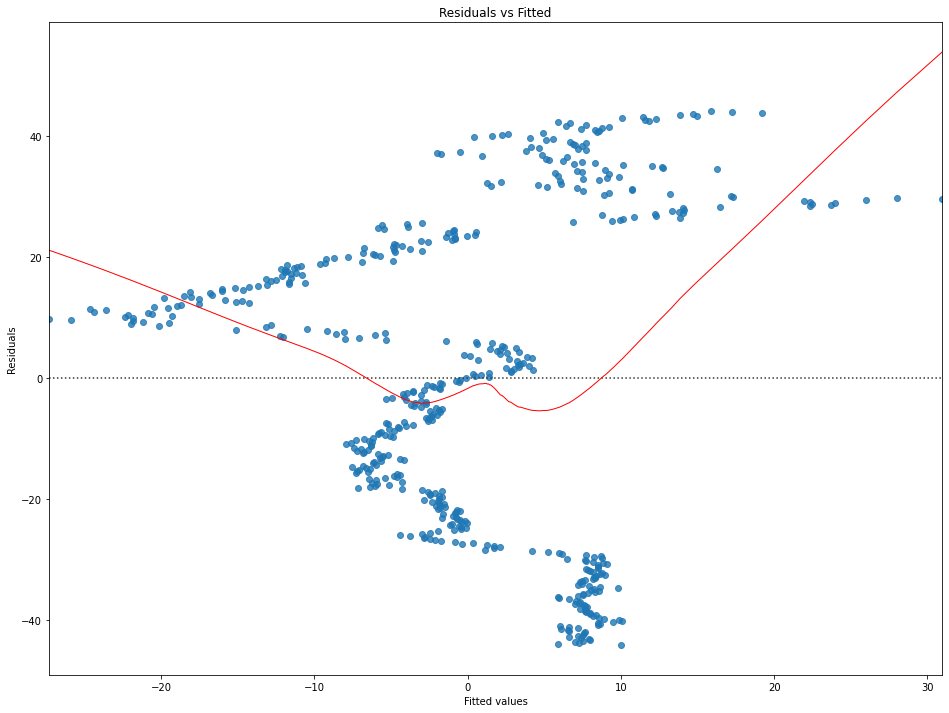

In [26]:
res_fitted = plt.figure()
res_fitted.axes[0] = sns.residplot(residuals, fitted_y, data = apple, lowess = True, line_kws = {'color':'red', 'lw':1, 'alpha':1})
plt.xlabel("Fitted values")
plt.title("Residual plot")
res_fitted.axes[0].set_title('Residuals vs Fitted')
res_fitted.axes[0].set_ylabel('Residuals')
res_fitted.axes[0].set_xlabel('Fitted values')

Scale-Location plot shows the red line is roughly horizontal, meaning the independent variables are having similar variance. But the scatters were not randomly spreaded around the red line, meaning it might not have equal varaibility. 

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Fitted values')

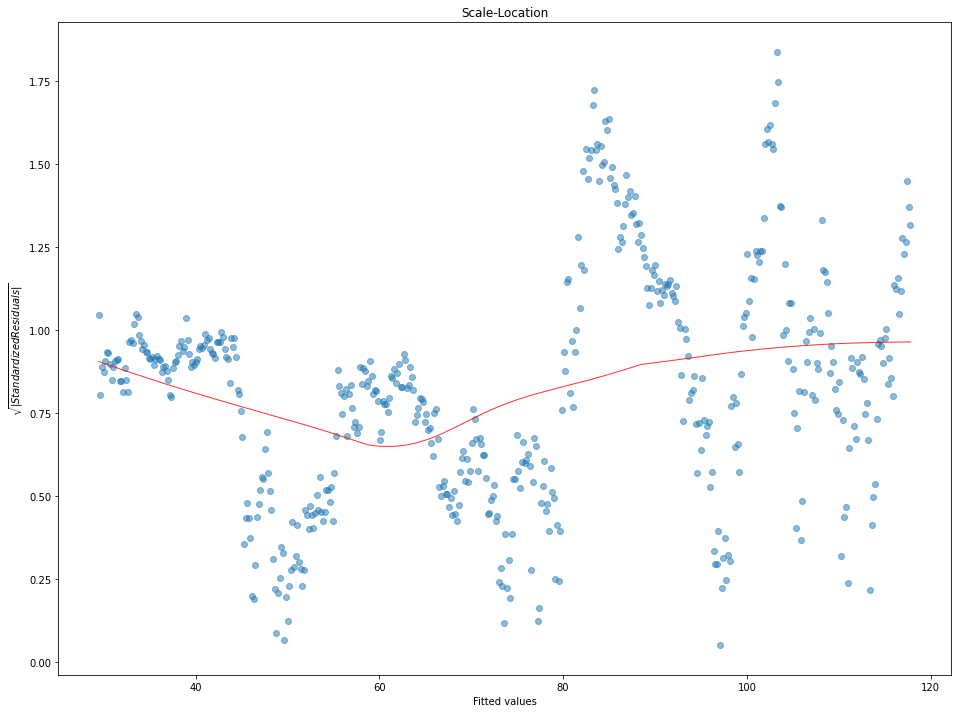

In [27]:
scale_loca = plt.figure()
plt.scatter(fitted_y, norm_resid_abs_sqrt, alpha = 0.5)
sns.regplot(fitted_y, norm_resid_abs_sqrt, scatter = False, ci = False, lowess = True, line_kws={'color':'red', 'lw':1,'alpha':0.8})
scale_loca.axes[0].set_title('Scale-Location')
scale_loca.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')
scale_loca.axes[0].set_xlabel('Fitted values')

Normal QQ plot displays most data points are placed in a diagonal line, meaning residuals are approximately normally distributed.

/usr/local/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0, 0.5, 'Standardized Residuals')

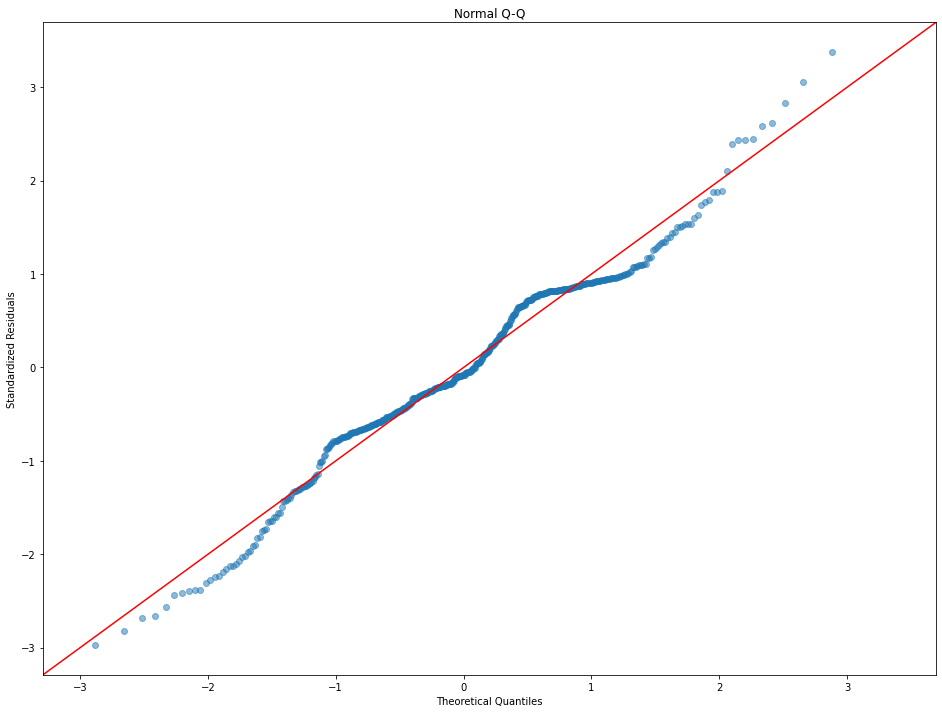

In [28]:
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(norm_resid)
lr_qq = QQ.qqplot(line = '45', alpha = 0.5, color = 'red', lw = 1)
lr_qq.axes[0].set_title('Normal Q-Q')
lr_qq.axes[0].set_ylabel('Standardized Residuals')

Residuals versus Leverage plot demonstrates data points mostly did fall next to the red line, meaning there are no huge influential data points.

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Standardized Residuals')

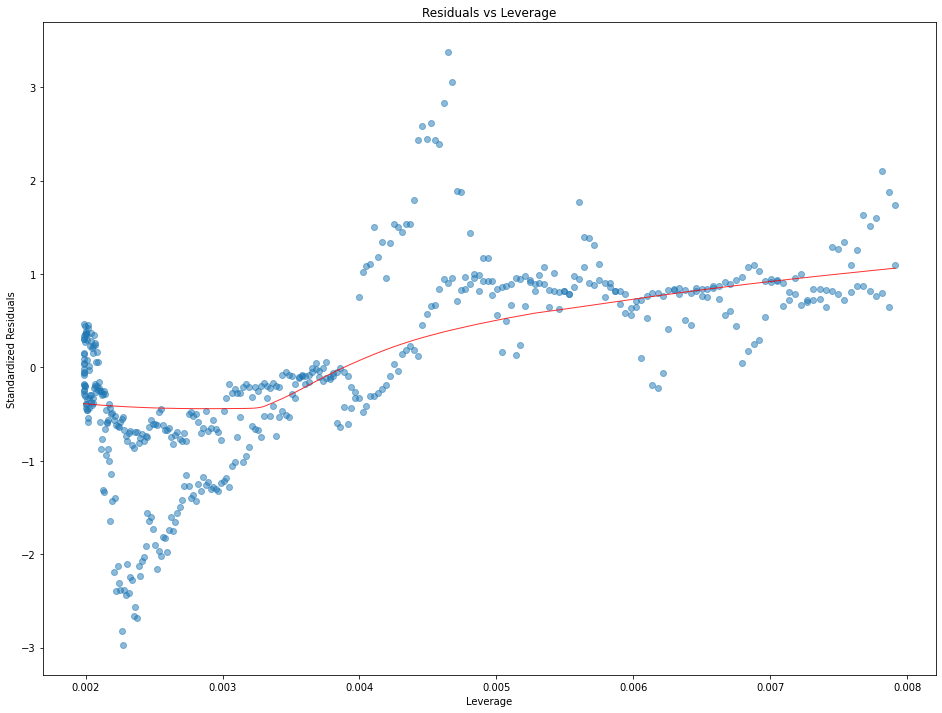

In [29]:
resid_vs_lever = plt.figure()
plt.scatter(leverage, norm_resid, alpha = 0.5)
sns.regplot(leverage, norm_resid, scatter = False, ci = False, lowess = True, line_kws = {'color':'red', 'lw':1, 'alpha':0.8})
resid_vs_lever.axes[0].set_title("Residuals vs Leverage")
resid_vs_lever.axes[0].set_xlabel("Leverage")
resid_vs_lever.axes[0].set_ylabel("Standardized Residuals")

<h3> 2) Google </h3>

For Google stock price development, it shows similar development as Apple. The price increased from January 2019 to December 2020, and there was a huge decrease in April 2020 and Octorber 2020.

Text(0.5, 1.0, 'Stock Price development (Google)')

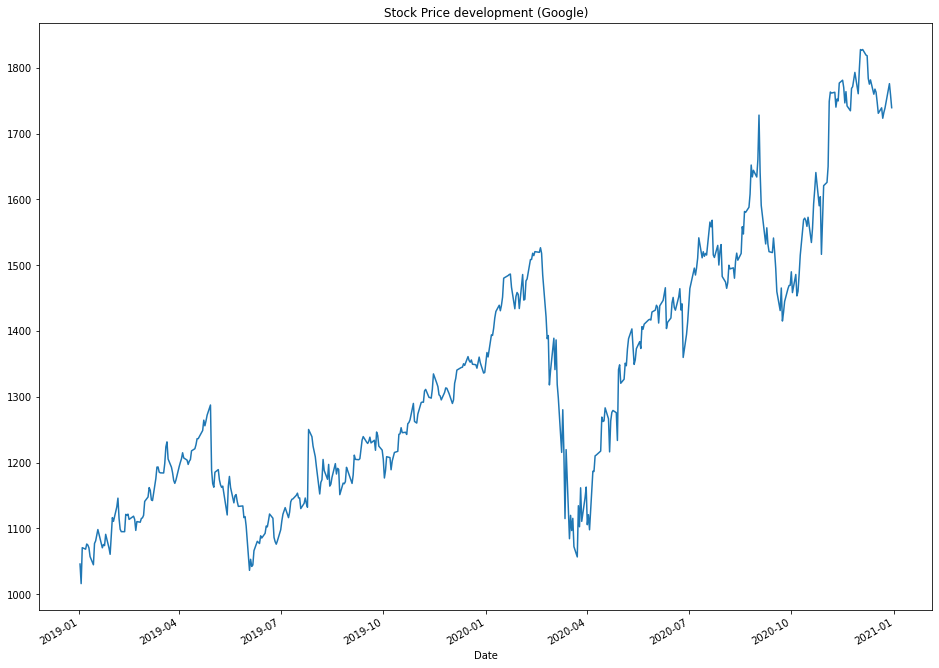

In [30]:
# google stock devleopment
google['Close'].plot()
plt.title('Stock Price development (Google)')

The linear regression line shows the price is increasing over time, although there was a big price drop. The root mean squared value is about 97.24.


97.24024930603464


Text(0.5, 1.0, 'Google stock prediction with Linear Regression')

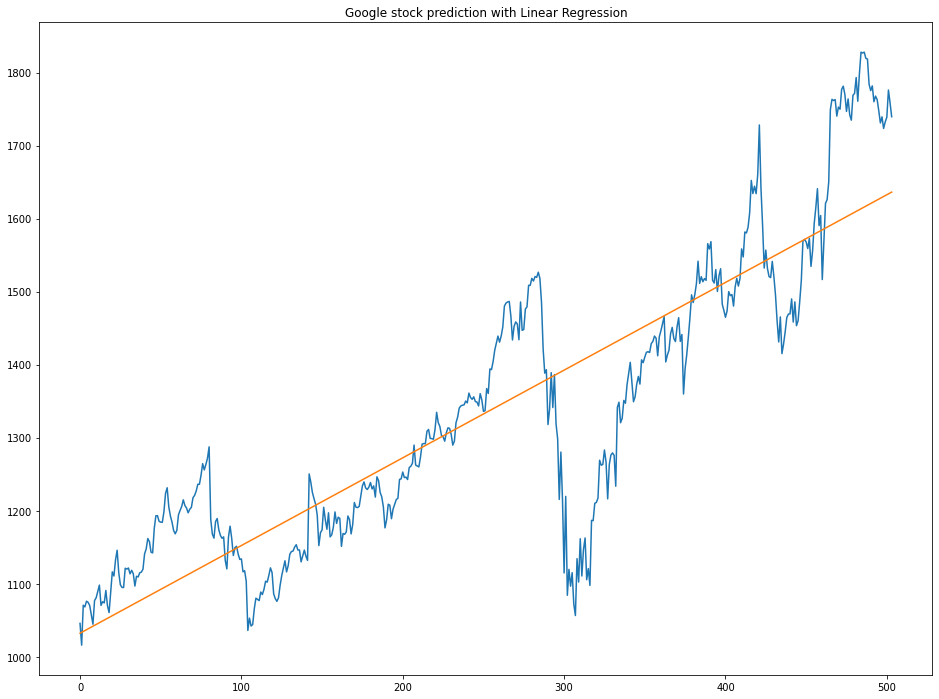

In [38]:
# google stock forecasting using linear regression
google = google.reset_index()
x2 = np.array(google.index).reshape(-1,1)
y2 = google['Close']

lr2 = LinearRegression().fit(x2,y2)
lr2.score(x2,y2)
google_pred = lr2.predict(x2)
print(np.sqrt(mean_squared_error(google_pred, y2)))

plt.plot(google['Close'])
plt.plot(google.index, google_pred)
plt.title("Google stock prediction with Linear Regression")

Below the table shows other linear regression evaluation values, such as adjusted R-squared,  F-statistic and AIC. The adjusted R-squred value is about 0.763 so it is slightly lower than the model that we could consider as a good linear regresison model. The AIC and BIC values are 6048 and 6057, this can be compared with other models.

In [32]:
x_constant_google = sm.add_constant(x2)
result_google = sm.OLS(y2,x_constant_google).fit()
result_google.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     1620.
Date:                Sat, 12 Mar 2022   Prob (F-statistic):          2.92e-159
Time:                        01:37:22   Log-Likelihood:                -3022.0
No. Observations:                 504   AIC:                             6048.
Df Residuals:                     502   BIC:                             6057.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1032.3859      8.667    119.114      0.000    1015.357    1049.414
x1             1.2007      0.030     40.251      0.000       1.142       1.259
==============================================================================
Omnibus:                       43.505   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.902
Skew:                          -0.628   Prob(JB):                     2.19e-14
Kurtosis:                       4.190   Cond. No.                         580.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
fitted_y2 = result_google.fittedvalues
residuals2 = result_google.resid
norm_resid2 = result_google.get_influence().resid_studentized_internal
norm_resid_abs_sqrt2 = np.sqrt(np.abs(norm_resid2))
abs_resid2 = np.abs(residuals2)
leverage2 = result_google.get_influence().hat_matrix_diag

Residuals versus fitted plot for Google linear model shows that the data points are not placed around the red horizontal line, meaning the linearity might not be ideal. 

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Fitted values')

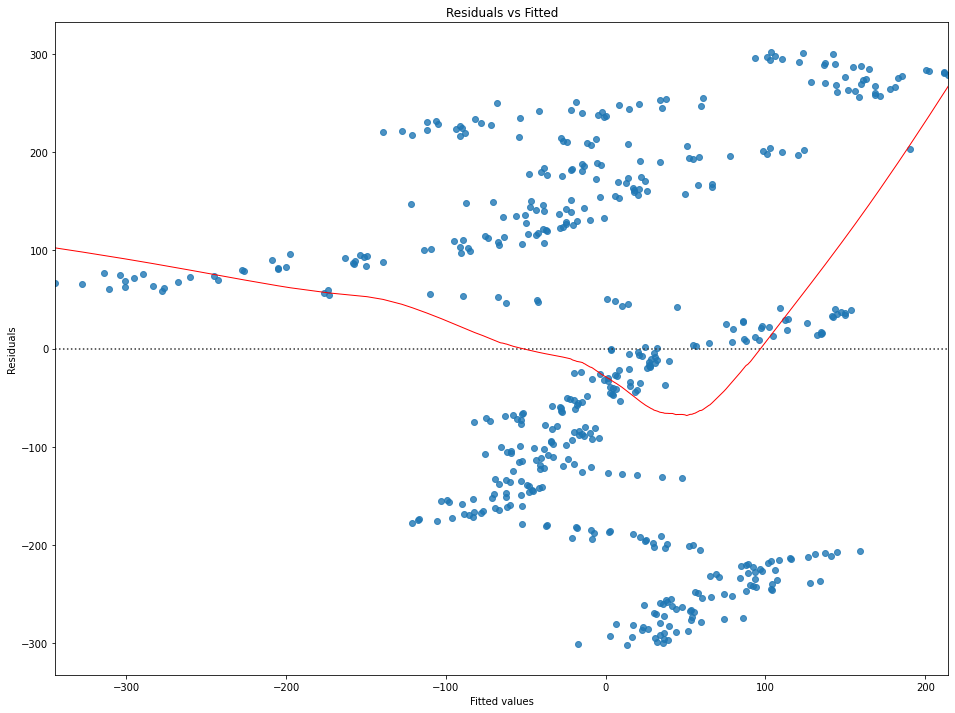

In [34]:
res_fitted2 = plt.figure()
res_fitted2.axes[0] = sns.residplot(residuals2, fitted_y2, data = google, lowess = True, line_kws = {'color':'red', 'lw':1, 'alpha':1})
plt.xlabel("Fitted values")
plt.title("Residual plot")
res_fitted2.axes[0].set_title('Residuals vs Fitted')
res_fitted2.axes[0].set_ylabel('Residuals')
res_fitted2.axes[0].set_xlabel('Fitted values')

Scale-Location plot shows the red line is fairly horizontal, meaning the independent variables are having similar variance, but the scatters are not randomly spread around the red line so it might not have equal variability. 

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Fitted values')

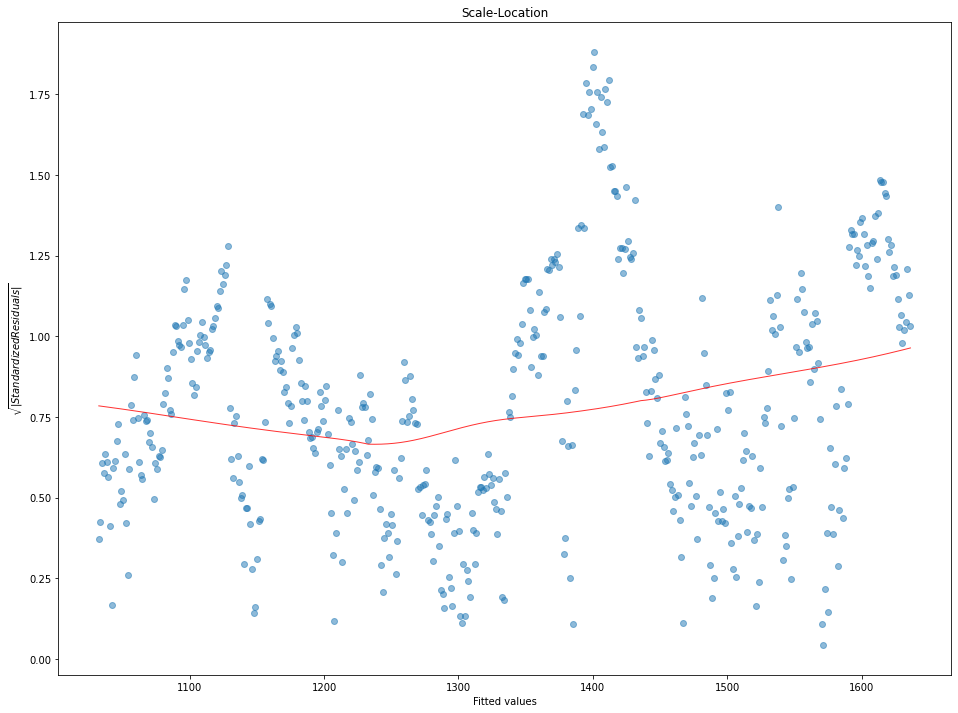

In [35]:
scale_loca2 = plt.figure()
plt.scatter(fitted_y2, norm_resid_abs_sqrt2, alpha = 0.5)
sns.regplot(fitted_y2, norm_resid_abs_sqrt2, scatter = False, ci = False, lowess = True, line_kws={'color':'red', 'lw':1,'alpha':0.8})
scale_loca2.axes[0].set_title('Scale-Location')
scale_loca2.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')
scale_loca2.axes[0].set_xlabel('Fitted values')

Normal QQ plot demonstrates that data points are placed in a diagonal line except a few points on the left, meaning residuals are approximately normally distributed.

/usr/local/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0, 0.5, 'Standardized Residuals')

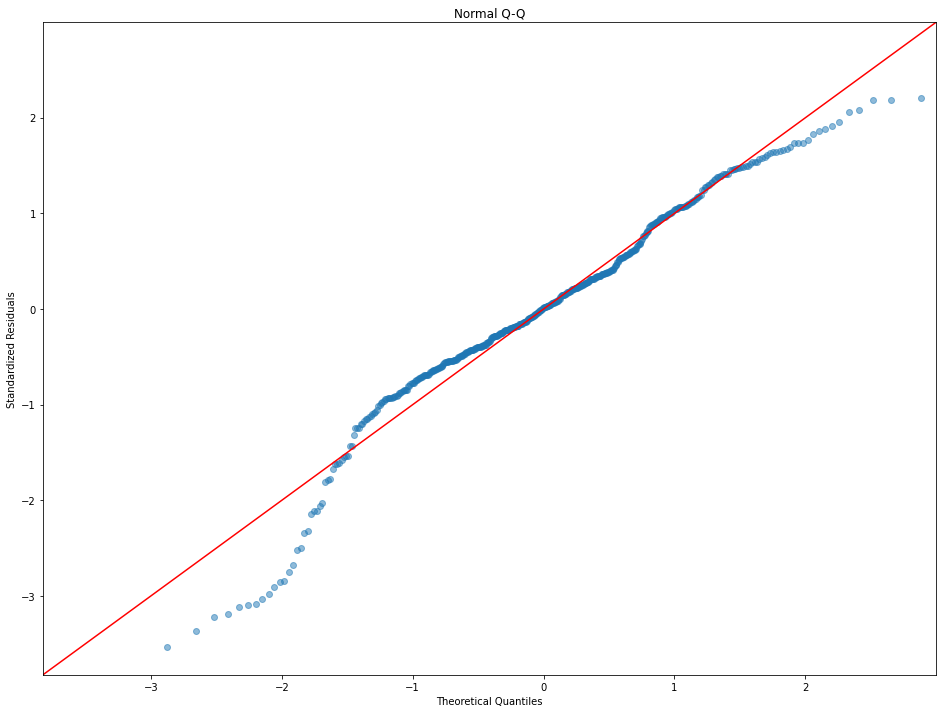

In [36]:
QQ2 = ProbPlot(norm_resid2)
lr_qq2 = QQ2.qqplot(line = '45', alpha = 0.5, color = 'red', lw = 1)
lr_qq2.axes[0].set_title('Normal Q-Q')
lr_qq2.axes[0].set_ylabel('Standardized Residuals')

Residuals versus Leverage plot shows most data points did fall around the red line, meaning there are no huge influential data points.

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Standardized Residuals')

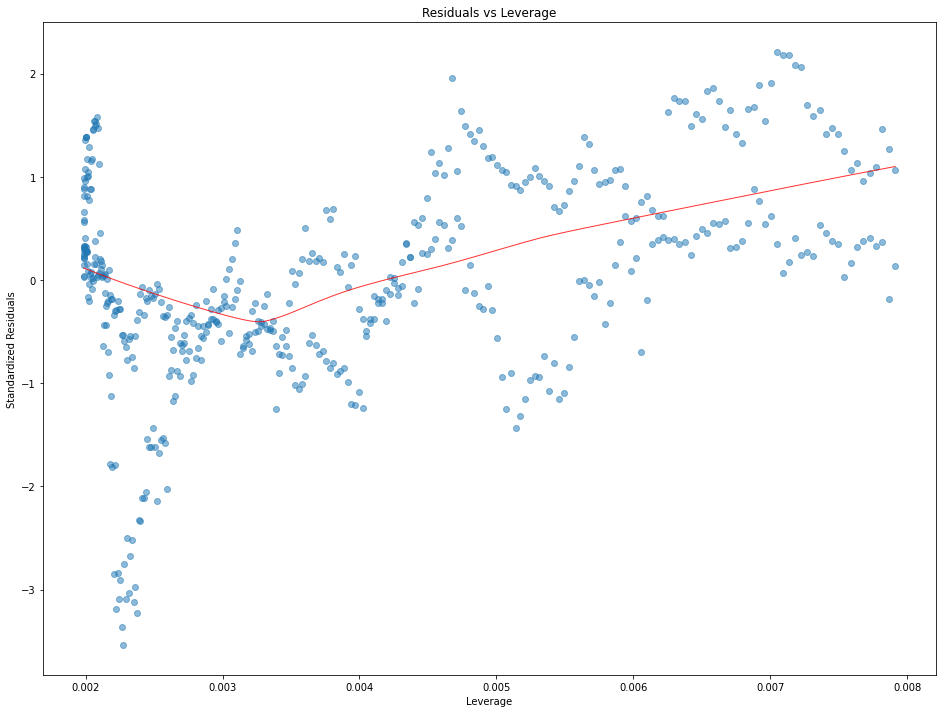

In [37]:
resid_vs_lever2 = plt.figure()
plt.scatter(leverage2, norm_resid2, alpha = 0.5)
sns.regplot(leverage2, norm_resid2, scatter = False, ci = False, lowess = True, line_kws = {'color':'red', 'lw':1, 'alpha':0.8})
resid_vs_lever2.axes[0].set_title("Residuals vs Leverage")
resid_vs_lever2.axes[0].set_xlabel("Leverage")
resid_vs_lever2.axes[0].set_ylabel("Standardized Residuals")

<h2>Conclusion</h2>

To predict stock price for Apple and Google, two years of stock data was extracted and cleaned for analysis. Four different forecasting methods were used to find the best model and the models were evaluated with the root mean squared values as well as diagnostic plots. For forecasting with exponential smoothing methods, if someone would like to predict short-term stock price, larger alpha and beta values are recommended since it takes the most recent data, and the other way around for the long-term prediction. For the investment, I will invest in Apple for short-term since the possible error of prediction is lower than Google. But for the long-term investment, I would recommend both companies since both stocks are increasing over time.

As a result, we could conclude the triple exponential smoothing method might be suitable for the stock prediction since stock price has trend or seasonality. Also, it could predict more precisely than the other forecasting methods especially for the short-term. Double exponential smoothing methods might be good for the long-term prediction since it shows direction for the stock price development. The linear regression method could be used for even longer-term prediction since it predicts entire pictures of the development instead of patterns. However, it could be a huge risk because it did not show a price drop although there could be a big price decrease. 



<h2>References</h2>

Jason Brownlee, *A Gentle Introduction to Exponential Smoothing for Time Series Forecasting in Python*, Aug 20. 2018, https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/ (Mar 12, 2022)

Rob J Hyndman and George Athanasopoulos, *Forecasting: Principles and Practice*, 2nd ed, https://otexts.com/fpp2/classical-decomposition.html (Mar 12, 2022)

Statsmodel v0.13.2, *Exponential smoothing*, https://www.statsmodels.org/stable/examples/notebooks/generated/exponential_smoothing.html (Mar 12, 2022)

Thalles' blog, *A Visual Guide to Time Series Decomposition Analysis*, Aug 8. 2019, https://sthalles.github.io/a-visual-guide-to-time-series-decomposition/ (Mar 12, 2022)
